## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

## Read and clean data

In [4]:
df = pd.read_csv(r'C:\Users\sriha\OneDrive\Desktop\DS\ML Bootcamp\Refactored_Py_DS_ML_Bootcamp-master\14-K-Nearest-Neighbors\KNN_Project_Data')
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


In [5]:
df.shape

(1000, 11)

In [6]:
df.isnull().sum()

XVPM            0
GWYH            0
TRAT            0
TLLZ            0
IGGA            0
HYKR            0
EDFS            0
GUUB            0
MGJM            0
JHZC            0
TARGET CLASS    0
dtype: int64

In [9]:
df.describe()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,1055.071157,991.851567,1529.373525,495.107156,940.590072,1550.637455,1561.003252,561.346117,1089.067338,1452.521629,0.50000
std,370.980193,392.278890,640.286092,142.789188,345.923136,493.491988,598.608517,247.357552,402.666953,568.132005,0.50025
min,21.170000,21.720000,31.800000,8.450000,17.930000,27.930000,31.960000,13.520000,23.210000,30.890000,0.00000
25%,767.413366,694.859326,1062.600806,401.788135,700.763295,1219.267077,1132.097865,381.704293,801.849802,1059.499689,0.00000
50%,1045.904805,978.355081,1522.507269,500.197421,939.348662,1564.996551,1565.882879,540.420379,1099.087954,1441.554053,0.50000
75%,1326.065178,1275.528770,1991.128626,600.525709,1182.578166,1891.937040,1981.739411,725.762027,1369.923665,1864.405512,1.00000
max,2117.000000,2172.000000,3180.000000,845.000000,1793.000000,2793.000000,3196.000000,1352.000000,2321.000000,3089.000000,1.00000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
XVPM            1000 non-null float64
GWYH            1000 non-null float64
TRAT            1000 non-null float64
TLLZ            1000 non-null float64
IGGA            1000 non-null float64
HYKR            1000 non-null float64
EDFS            1000 non-null float64
GUUB            1000 non-null float64
MGJM            1000 non-null float64
JHZC            1000 non-null float64
TARGET CLASS    1000 non-null int64
dtypes: float64(10), int64(1)
memory usage: 86.1 KB


This dataset is already cleaned. On to the next step. 

## Exploratory Data Analysis
This data is artificial, and there are no real insights to be gained from it. Just do a pairplot for basic visualization.

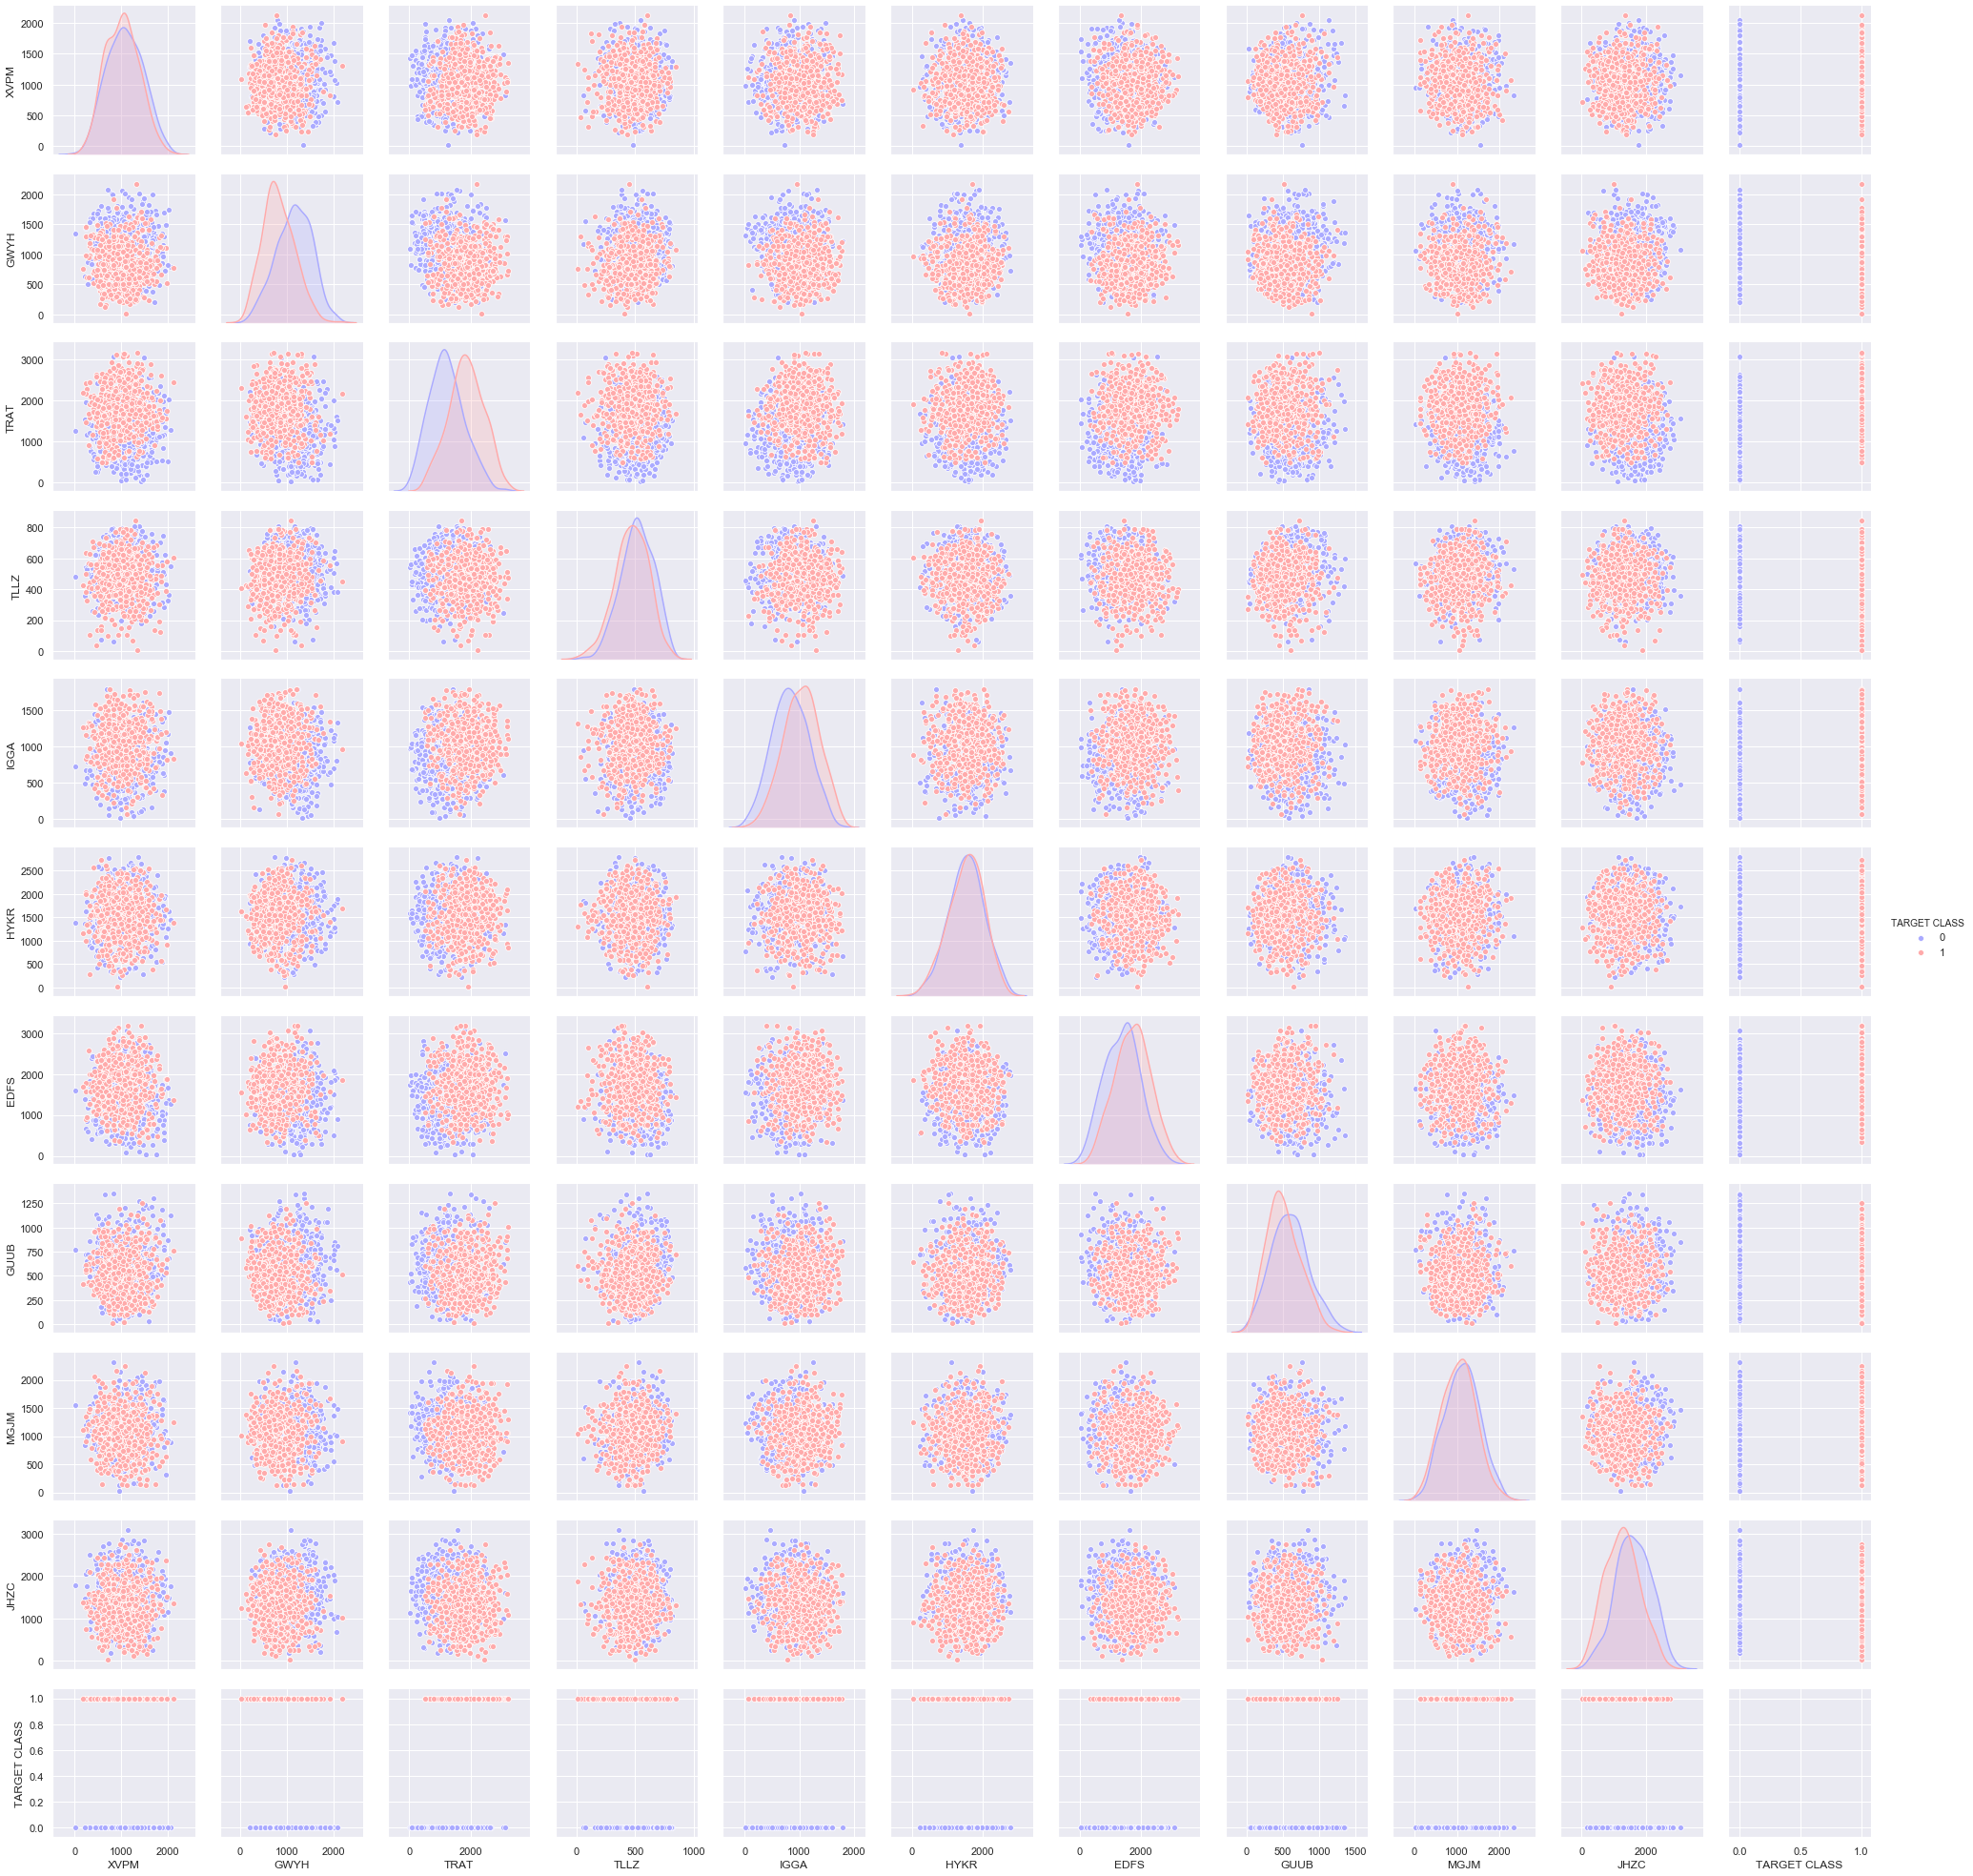

In [12]:
sns.pairplot(df, hue='TARGET CLASS', palette='bwr')

 ## Train KNN model

Standardize the features

In [20]:
# Create scaler object
scaler = StandardScaler()

# Create dataframe with scaled features
scaler.fit(df.drop('TARGET CLASS', axis=1))
scaled_features = scaler.transform(df.drop('TARGET CLASS', axis=1))
df_feat = pd.DataFrame(scaled_features, columns=df.columns[:-1])
df_feat.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


Now, train/test split; fit model; make predictions

In [21]:
# Train/test split

X = df_feat
y = df['TARGET CLASS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [27]:
# Fit model

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [28]:
# Make predictions

predictions = knn.predict(X_test)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.70      0.73      0.72       163
           1       0.73      0.70      0.71       167

    accuracy                           0.72       330
   macro avg       0.72      0.72      0.72       330
weighted avg       0.72      0.72      0.72       330

[[119  44]
 [ 50 117]]
